In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score



# **Business Objective**

Use patient clinical and diagnostic attributes (Age, Sex, Chest Pain Type, Blood Pressure, Cholesterol, ECG results, etc.) to identify individuals at high risk of Heart Disease so hospitals can:

Prioritize early screening

Reduce emergency events

Improve treatment planning

Optimize resource allocation

In [ ]:
##Load Data
df =pd.read_csv(r"/content/drive/MyDrive/EDA files/heart.csv")


In [ ]:
##Handling Missing Value

df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
##Handling Duplicate value

df.duplicated().sum()

np.int64(0)

# **Data Understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.shape

(918, 12)

# **Target Variable Analysis**

<Axes: ylabel='count'>

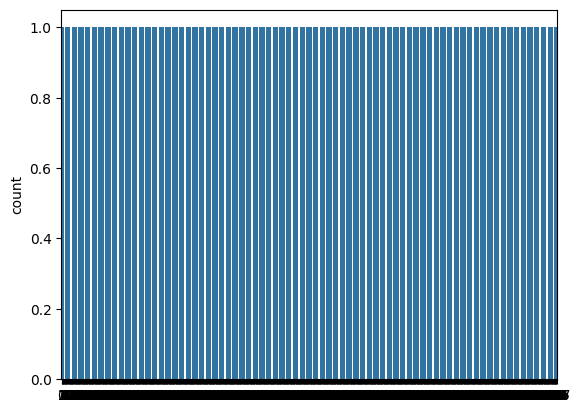

In [ ]:
df['HeartDisease'].value_counts(normalize=True)
sns.countplot(df['HeartDisease'])

# **Univariate Analysis  -  Numerical Features**

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

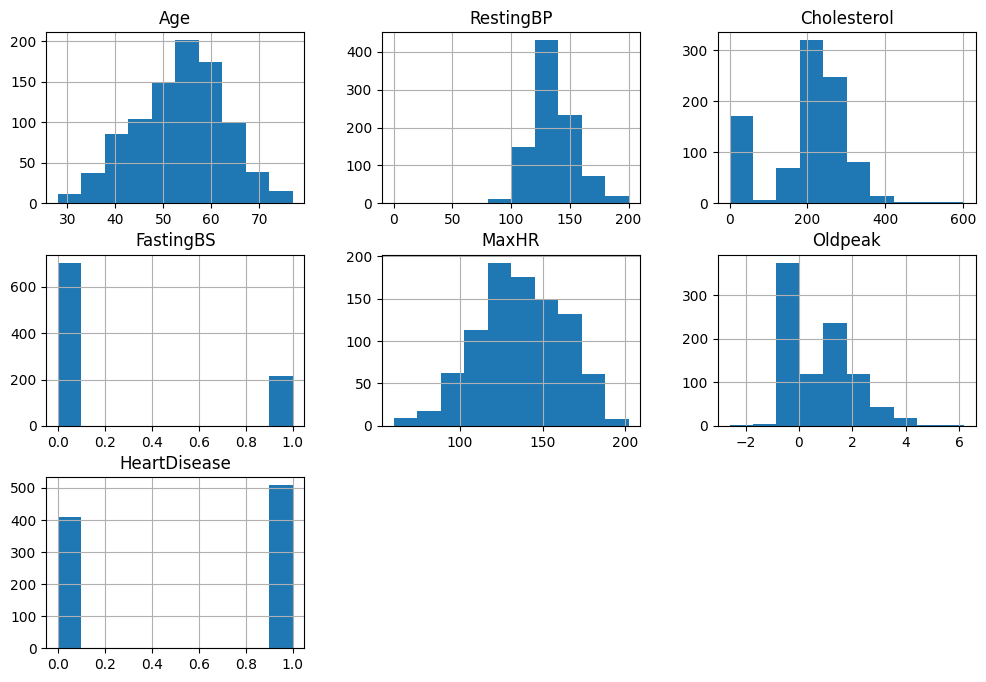

In [ ]:
df.hist(figsize=(12,8))

# **Univariate Analysis  - Categorical Features**

<Axes: xlabel='ChestPainType', ylabel='count'>

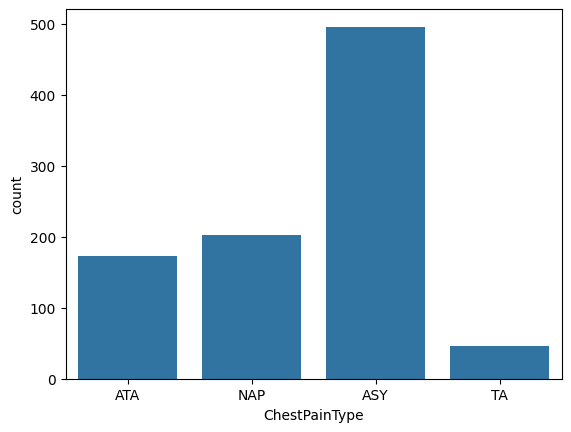

In [ ]:
sns.countplot(x='ChestPainType', data=df)

# **Numeric vs Target**

<Axes: xlabel='HeartDisease', ylabel='Age'>

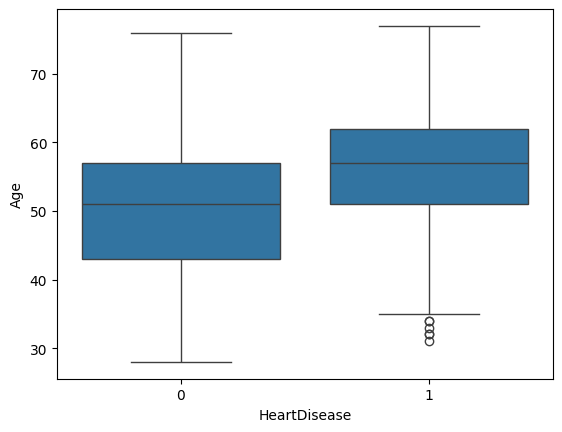

In [ ]:
sns.boxplot(x='HeartDisease', y='Age', data=df)

# **Categorical vs Target**

<Axes: xlabel='Sex', ylabel='count'>

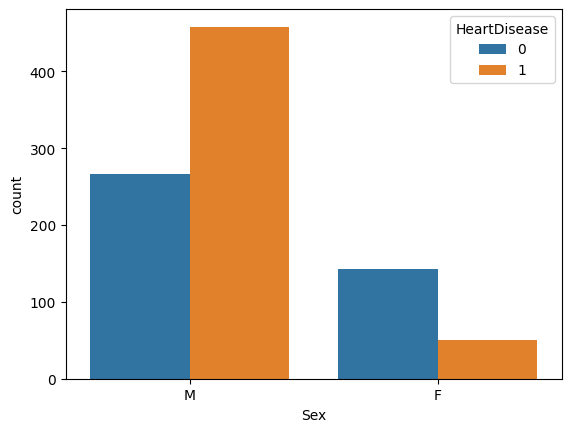

In [ ]:
pd.crosstab(df['Sex'], df['HeartDisease'], normalize='index')
sns.countplot(x='Sex', hue='HeartDisease', data=df)

# **Correlation Analysis**

<Axes: >

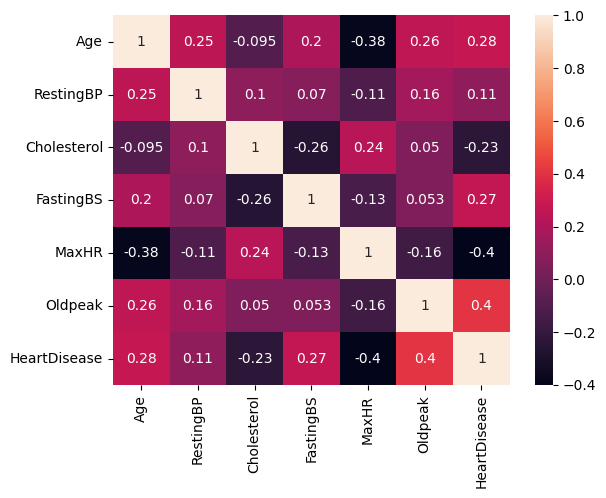

In [ ]:
numeric = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric.corr(), annot=True)

# **Feature Engineering**

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X = pd.get_dummies(X, drop_first=True)

rf = RandomForestClassifier()
rf.fit(X, y)

pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)

,0
ST_Slope_Up,0.159135
Oldpeak,0.122309
MaxHR,0.109717
Cholesterol,0.108971
ST_Slope_Flat,0.096252
ExerciseAngina_Y,0.081270
Age,0.079528
RestingBP,0.071190
ChestPainType_ATA,0.044422
Sex_M,0.040449


# **Machine Learning Model**

In [ ]:
X = pd.get_dummies(df.drop('HeartDisease', axis=1), drop_first=True)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
log = LogisticRegression(max_iter=500)
log.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
log_pred = log.predict(X_test)
rf_pred = rf.predict(X_test)

print("Logistic AUC:", roc_auc_score(y_test, log.predict_proba(X_test)[:,1]))
print("RF AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

print("\nLogistic Report:\n", classification_report(y_test, log_pred))
print("\nRandom Forest Report:\n", classification_report(y_test, rf_pred))

Logistic AUC: 0.9326877092300334
RF AUC: 0.9297584887613582

Logistic Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86        82
           1       0.86      0.93      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184


Random Forest Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

